# Loss functions
In this chapter you will discover the conceptual framework behind logistic regression and SVMs. This will let you delve deeper into the inner workings of these models.

# 1. Linear classifiers: the coefficients
## 1.1 How models make predictions
Which classifiers make predictions based on the sign (positive or negative) of the raw model output?

###### Possible Answers:
1. Logistic regression only
2. Linear SVMs only
3. Neither
4. Both logistic regression and Linear SVMs

###### Answer: 
<div style="text-align: right">Both. (4)</div>
<div style="text-align: right">Furthermore, since logistic regression and SVMs are both linear classifiers, the raw model output is a linear function of x.</div>

## 1.2 Changing the model coefficients
When you call `fit` with scikit-learn, the logistic regression coefficients are automatically learned from your dataset. In this exercise you will explore how the decision boundary is represented by the coefficients. To do so, you will change the coefficients manually (instead of with `fit`), and visualize the resulting classifiers.

A 2D dataset is already loaded into the environment as `X` and `y`, along with a linear classifier object `model`.

In [16]:
"""
Adapted from http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
"""

import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_classifier(X, y, clfs):

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    titles = ('LogisticRegression', 'LinearSVC', 'SVC', 'KNeighborsClassifier')
    
#     for clf, title, ax in zip(clfs, titles, sub.flatten()):
    fig, ax = plt.subplots()

    plot_contours(ax, clfs, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
#         ax.set_xlabel(' ')
#         ax.set_ylabel(' ')
    ax.set_xticks(())
    ax.set_yticks(())
#     ax.set_title(title)

    plt.show()

C:\Python37\Mikele\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


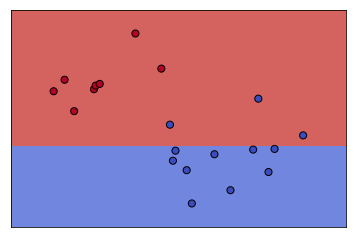

In [17]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.linear_model import LogisticRegression
import sys
sys.path.append('/usr/local/share/datasets/')
# from plot_classifier import *

# generate synthetic data with fixed random seed
np.random.seed(3)
N = 20
X = np.random.randn(N,2)
y = np.random.choice((-1,+1),size=N)
X[y>0,0] -= 3
X[y>0,1] += 3

# plt.scatter(X[y<0,0], X[y<0,1], color='b', marker='x', label='class $-1$')
# plt.scatter(X[y>0,0], X[y>0,1], color='r', marker='o',  label='class $+1$')
# plt.tick_params(axis='both', which='both', bottom='off', left='off', labelbottom='off', labelleft='off') 
# remove ticks
# plt.legend(loc='best')

model = LogisticRegression()
model.fit(X,y)
model.coef_ = np.array([[0,1]])
model.intercept_ = np.array([0])

# TODO: we want this -- figure out why it is square?!?!
plot_classifier(X,y,model)

### Instructions:
* Set the two coefficients and the intercept to various values and observe the resulting decision boundaries.
* Try to build up a sense of how the coefficients relate to the decision boundary.
* Set the coefficients and intercept such that the model makes no errors on the given training data.

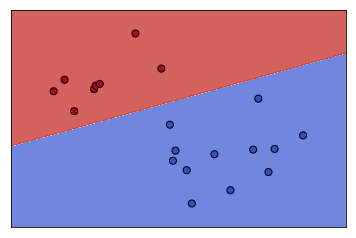

Number of errors: 0


In [18]:
# Set the coefficients
model.coef_ = np.array([[-1,2]])
model.intercept_ = np.array([-5])

# Plot the data and decision boundary
plot_classifier(X,y,model)

# Print the number of errors
num_err = np.sum(y != model.predict(X))
print("Number of errors:", num_err)

As you've been experiencing, the coefficients determine the slope of the boundary and the intercept shifts it.